# Chapter 18: Regression Models and Evaluation
## Exercises solutions

## Exercise 1
Inspect the coefficients of the linear model trained on the polynomial features. Find the coefficient responsible for the large error and explain why it has an especially strong effect on the polynomial features. 

For this exercise we will use the *diabetes* dataset: this dataset has 10 attributes about a patient as features and disease progression after a year as the target. The dataset contains data for 442 patients.

In [1]:
# import all the modules
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

We load the dataset and analyse its attributes:

In [2]:
# load the dataset
dataset = load_diabetes()
# store the features in a variable X
X = dataset.data
# store the targets in a variable y 
y = dataset.target

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(dataset)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{dataset.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{dataset.feature_names}\n')
# this is the features file name
print(f'Feaures file name: \n{dataset.data_filename}\n')
# this is the targets/labels file
print(f'Target file name: \n{dataset.target_filename}\n')
# number of samples
print(f'Number of samples: \n{len(dataset.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Feaures names: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Feaures file name: 
diabetes_data.csv.gz

Target file name: 
diabetes_target.csv.gz

Number of samples: 
442



Note how, differently from the previous Sklearn datasets, the *diabetes* dataset pulls features and targets data from two different datafiles. 

### Data Preparation

We split the data in training, validation and test sets:

In [3]:
from sklearn.model_selection import train_test_split

seed = 0 # this is used with the train_test_split to avoid random behaviour 

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.4,random_state=seed)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=.5,random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of features in the validation set: {len(X_val)}')
print(f'Number of features in the test set: {len(X_test)}')

Number of features in the training set: 265
Number of features in the validation set: 89
Number of features in the test set: 88


We stadardize the features:

In [4]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train_scl = sclr.transform(X_train) # scale all 3 sets:
X_val_scl = sclr.transform(X_val)
X_test_scl = sclr.transform(X_test)


print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_val_scl mean: {np.mean(X_val_scl)}, X_train_scl std: {np.std(X_val_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: 9.384526698718305e-18, X_train_scl std: 1.0000000000000002
X_val_scl mean: -0.026560858245457477, X_train_scl std: 0.9586107835341086
X_test_scl mean: -0.006411628461981172, X_test_scl std: 0.9215631575692944


We process the data to a second polyynomial degree, so that we have more features that relate to the input in different ways:

In [5]:
from sklearn.preprocessing import PolynomialFeatures
pf2 = PolynomialFeatures(degree=2)
X_train_sc_pf2 = pf2.fit_transform(X_train_scl)

print(f'X_train data - Number of samples:  {X_train.shape[0]}, Number of features: {X_train.shape[1]}')
print(f'X_train_sc_pf2 - Number of samples:  {X_train_sc_pf2.shape[0]}, Number of features: {X_train_sc_pf2.shape[1]}')

X_train data - Number of samples:  265, Number of features: 10
X_train_sc_pf2 - Number of samples:  265, Number of features: 66


### Model Training

With the available programming libraries in Python or R, linear regression is very easy to use and just like the previous models for classification we use their fit and predict methods:

In [6]:
from sklearn.linear_model import LinearRegression

# create the polynomial features from the scaled sets 
X_val_sc_pf2 = pf2.transform(X_val_scl)
X_test_sc_pf2 = pf2.transform(X_test_scl)

# train a linar model 
lr2 = LinearRegression()
lr2.fit(X_train_sc_pf2,y_train)

# helper functions to calculate the accuracy values on train, validation and test set. 
def rmse(X,y,predictor):
    return (mse(X,y,predictor))**.5

# helper functions to calculate the accuracy values on train, validation and test set. 
def mse(X,y,predictor):
    return ((predictor.predict(X)-y)**2).mean()

def trainValTestMse(predictor):
    vals = {}
    vals['train'] = rmse(X_train_scl,y_train,predictor)
    vals['val'] = rmse(X_val_scl,y_val,predictor)
    vals['test'] = rmse(X_test_scl,y_test,predictor)
    return vals

# make predictions and print the model performance
print('Poly2 Features, train RMSE: ', rmse(X_train_sc_pf2,y_train,lr2),
      ', val RMSE: ' , rmse(X_val_sc_pf2,y_val,lr2),
      ', test RMSE: ' , rmse(X_test_sc_pf2,y_test,lr2))

Poly2 Features, train RMSE:  44.510653384993034 , val RMSE:  67.57200276608783 , test RMSE:  63.302612578827166


### Model Evaluation

We can retrieve the non-zero polynamial features and see their weight:

In [7]:
nz_feature_names = pf2.get_feature_names_out()[np.nonzero(lr2.coef_)]
nz_feature_values = lr2.coef_[np.nonzero(lr2.coef_)]
zipped = list(zip(nz_feature_names,nz_feature_values))
print('Names and values of non-zero coefficients', zipped)

Names and values of non-zero coefficients [('1', 2.5223795439938152e-11), ('x0', -0.20511584590732124), ('x1', -1524667891983.5903), ('x2', 25.040544010051313), ('x3', 13.961026894473497), ('x4', 616.9132360227866), ('x5', -550.7496843582958), ('x6', -250.38763410759816), ('x7', -6.787510444727749), ('x8', -166.05624389648438), ('x9', -2.8990478515625), ('x0^2', 4.3992919921875), ('x0 x1', 11.645872592926025), ('x0 x2', -0.1331024169921875), ('x0 x3', -1.105499267578125), ('x0 x4', 18.490509033203125), ('x0 x5', -35.373291015625), ('x0 x6', 0.9011077880859375), ('x0 x7', 14.819023132324219), ('x0 x8', -3.2235870361328125), ('x0 x9', 4.136219024658203), ('x1^2', 67335183326055.91), ('x1 x2', 4.298942565917969), ('x1 x3', 6.38946533203125), ('x1 x4', 37.453277587890625), ('x1 x5', -35.497161865234375), ('x1 x6', -4.8126220703125), ('x1 x7', 6.168281555175781), ('x1 x8', -18.69781494140625), ('x1 x9', -1.32861328125), ('x2^2', 0.92742919921875), ('x2 x3', 3.303680419921875), ('x2 x4', -2.

In [8]:
# sort the features by their coefficients weights
zipped.sort(key=lambda x: x[1], reverse = True)
zipped

[('x1^2', 67335183326055.91),
 ('x4', 616.9132360227866),
 ('x4^2', 302.24859619140625),
 ('x5 x8', 249.1632080078125),
 ('x5 x6', 202.0415496826172),
 ('x6 x8', 151.4703369140625),
 ('x5^2', 139.02743530273438),
 ('x6 x7', 119.61395263671875),
 ('x5 x7', 115.12100219726562),
 ('x6^2', 93.84478759765625),
 ('x3 x5', 70.01773071289062),
 ('x7 x8', 64.32049560546875),
 ('x5 x9', 54.50048828125),
 ('x1 x4', 37.453277587890625),
 ('x7^2', 34.46563720703125),
 ('x3 x6', 32.48463439941406),
 ('x3 x8', 25.46917724609375),
 ('x2', 25.040544010051313),
 ('x6 x9', 24.528472900390625),
 ('x8^2', 23.83916473388672),
 ('x8 x9', 20.477493286132812),
 ('x0 x4', 18.490509033203125),
 ('x2 x7', 16.06646728515625),
 ('x0 x7', 14.819023132324219),
 ('x3', 13.961026894473497),
 ('x2 x6', 11.7989501953125),
 ('x0 x1', 11.645872592926025),
 ('x9^2', 8.383834838867188),
 ('x3^2', 6.927154541015625),
 ('x1 x3', 6.38946533203125),
 ('x1 x7', 6.168281555175781),
 ('x2 x8', 6.022502899169922),
 ('x0^2', 4.399291

It is particularly evident how some features'coefficients tend to "explode" (e.g., 'x1^2': 67335183326055.91 and 'x1': -1524667891983.5903) in the model's research of fitting each data point exactly. This is the typical behaviour of a model **overfitting** the traininig data, therefore incapable of generalising on unseen data and likely to yield much big errros on validation and test sets. This issue with high-order polynomials tends to get worse with the increasing of the polynomial order. <br>Standard solutions to this problem are regularizations methods such as *L1 (Lasso)* and *L2 (Ridge)* which add a penalty term to the model's *cost function* proportional to the size of the coefficients, hence penalizing large values. Namely, the L1 regularization adds a *penalty* equal to the absolute value of the magnitude of the coefficients, whereas the L2 regularization one equal to the square of the magnitude. These techniques can help reduce *variance* in the model and yield smaller generalization errors.

## Exercise 2
Implement a grid search for the alpha parameter of a linear regression on the train/validation split with the poly 2 features of the diabetes data: 

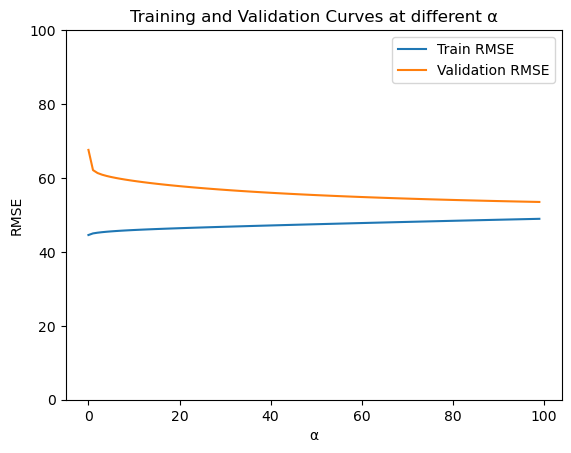

In [9]:
from sklearn.linear_model import Ridge

# we store trainig and validation scores here
scores_t = []; scores_v = [] 

# set the range of values for our hyperparameter
params = np.arange(0, 100)

# test the KNN at different number of neighbors and append the results to the above lists
for p in params:
    lr_rd = Ridge(alpha = p, fit_intercept=True)
    lr_rd.fit(X_train_sc_pf2, y_train)
    scores_t.append(rmse(X_train_sc_pf2, y_train, lr_rd))
    scores_v.append(rmse(X_val_sc_pf2, y_val, lr_rd))

# plot the training and validation curves 
plt.title("Training and Validation Curves at different α")
plt.xlabel("α")
plt.ylabel("RMSE")
plt.ylim(0, 100)
plt.plot(params, scores_t, label="Train RMSE")
plt.plot(params, scores_v, label="Validation RMSE")
plt.legend(loc="best");

We notice how larger values of α for the *Ridge (L2)* regularization loss reduce the model's *variance* resulting in progressively higher errors on the trainig data but a better generalization error on the validation data. Regularization techniques can help us control what in ML is described as *bias-variance trade-off* of a model, which relates to its degree of fitting the trainig and validation data (*underfitting-overfitting*). It's the operator's task to find the sweat-spot where the model performs at the desired/required accuracy level on either or both the trainig and validation data.  

## Exercise 3
Implement a grid search for the alpha parameter of a linear regression using cross validation with the poly 2 features of the diabetes data. Use the Scikit-Learn class GridSearchCV. 

In [10]:
from sklearn.model_selection import GridSearchCV

# implemente a linear least squares with l2 regularization
lr_rd = Ridge(fit_intercept=True)

# check alpha parameters between 0 and 100 
parameters = {'alpha':np.arange(0, 100)}

# in sklearn all scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error.
scoring = {'MSE': 'neg_root_mean_squared_error'}

# set a 5 fold nested grid search on the poly2 features
clf = GridSearchCV(lr_rd, parameters, scoring = scoring, refit = False, cv = 5)
clf.fit(X_train_sc_pf2, y_train)

# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_MSE').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE
67,0.000209,0.000418,0.000621,0.000508,67,{'alpha': 67},-51.246532,-56.870821,-64.272535,-55.076004,-56.220974,-56.737373,4.241995,1
68,0.000600,0.000490,0.000000,0.000000,68,{'alpha': 68},-51.261669,-56.861426,-64.252735,-55.066144,-56.245864,-56.737568,4.231170,2
66,0.000435,0.000538,0.000200,0.000400,66,{'alpha': 66},-51.231746,-56.880644,-64.292808,-55.086603,-56.196060,-56.737572,4.252884,3


In [11]:
lr_rd = Ridge(alpha = 67, fit_intercept=True)
lr_rd.fit(X_train_sc_pf2, y_train)

print('Train RMSE: ', rmse(X_train_sc_pf2, y_train,lr_rd),)
print('Val RMSE: ', rmse(X_val_sc_pf2, y_val,lr_rd))

Train RMSE:  48.0190692372308
Val RMSE:  54.53498875140474


Through a nested grid search we can find the value of α that yields the best model performance on the given data. To notice how the model performance varies on the splits (look at *split2*) which highliths how training and testing a model is a complex matter, where all the moving parts can have a significant impact on the final result. E.g., if we tested this model on differnt splits, would we alwasy get the same optimal α?

## Exercise 4
Load the California Housing dataset (either with sklearn.datasets.fetch_california_housing or from here ) and predict the house price (as a regression). Use different models, expand the features, tune the hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models.  

In [12]:
# load the dataset
df = sklearn.datasets.fetch_california_housing()

# this dataset is a class 
print(f'Dataset type: \n{type(df)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{df.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{df.feature_names}\n')
# this is our target (y)
print(f'Target name: \n{df.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(df.data)}\n')


Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Feaures names: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target name: 
['MedHouseVal']

Number of samples: 
20640



### Data Preparation

In [13]:
# assign features and targets to X and y
X = df.data
y = df.target

# split features and targets in train and test sets (). Note how we can easily stratify the sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 14448
Number of targets in the training set: 14448
Number of features in the test set: 6192
Number of targtes in the test set: 6192


Normalize the data:

In [14]:
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train_scl = sclr.transform(X_train) # scale all 3 sets:
X_test_scl = sclr.transform(X_test)


print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: -7.349110860901894e-15, X_train_scl std: 1.000000000000002
X_test_scl mean: 0.005991271762881557, X_test_scl std: 1.2785474136594306


### Models Training
Let us compare a few regression models:
- Ordinary least squares (OLS)
- Lasso 
- Ridge 
- Decision tree
- Multy-layer perceptron (MLP)

We fit and train a "vanilla" version of the models on the data. No hyperparameters tuning, no expanded features, all very basic for now: 

In [15]:
# import the models 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# OLS
ols = LinearRegression()
# Lasso
lasso = Lasso()
# Ridge
ridge = Ridge()
# Decision tree
dt = DecisionTreeRegressor()
# MLP
mlp = MLPRegressor(max_iter = 500)
# store the models in a list of models 
models = [ols, lasso, ridge, dt, mlp]
# loop through the above list to fit, train and test the models
for model in models:
    model.fit(X_train_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, model):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, model):.3f}')


LinearRegression(): 
Train RMSE: 0.719 - Test RMSE: 0.737
Lasso(): 
Train RMSE: 1.154 - Test RMSE: 1.155
Ridge(): 
Train RMSE: 0.719 - Test RMSE: 0.737
DecisionTreeRegressor(): 
Train RMSE: 0.000 - Test RMSE: 0.733
MLPRegressor(max_iter=500): 
Train RMSE: 0.522 - Test RMSE: 0.546


We notice how the MLP was the best peformer in this scenario. Also interesting to see how the decision tree perfectly fitted the training data (trees tend to *overfit* if not tuned). 

### Models training on polynomial features

Let us expand the features:

In [16]:
# create polynomial features for the scaled training and test features
pf = PolynomialFeatures(degree=2)
X_train_pf_scl = pf.fit_transform(X_train_scl)
X_test_pf_scl = pf.transform(X_test_scl)

In [17]:
for model in models:
    model.fit(X_train_pf_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_pf_scl, y_train, model):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_pf_scl, y_test, model):.3f}')

LinearRegression(): 
Train RMSE: 0.646 - Test RMSE: 1.462
Lasso(): 
Train RMSE: 1.132 - Test RMSE: 1.133
Ridge(): 
Train RMSE: 0.646 - Test RMSE: 1.428
DecisionTreeRegressor(): 
Train RMSE: 0.000 - Test RMSE: 0.742
MLPRegressor(max_iter=500): 
Train RMSE: 0.958 - Test RMSE: 1.807


Above we can see how the *linear models* respond well to training on the polynomial features, altough they overfit the data more heavily and will require more extensive hyperparameter tuning to transfer that learning to the test data. Differently, MLP (non-linear) does not like that features engineering at all... <br> By looking at the above results, in accordance with the theory, we can try and optimize the linear models (OLS, Lasso and Ridge) on the polynomial features and the *non-linear* models (Decision Tree and MLP on the original features):

### Models fine tuning
We set the hyperparameters space for each model:

In [18]:
# Lasso
lasso_param = {'alpha':np.arange(1, 100)}
# Ridge
ridge_param = {'alpha':np.arange(1, 100)}
# Decision tree
dt_param = {'max_depth':np.arange(1, 20, 4), 
            'min_samples_split':np.arange(2, 8, 2),
            'min_samples_leaf':np.arange(1, 20, 4)}

# MLP - we can specify its architecture by defining the number of neurons at each layer 
mlp_param = {'hidden_layer_sizes': [(100,), (100, 100)],
             'max_iter': [500]}

We run a nested gridsearch for each model:

In [19]:
# in sklearn all scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error.
scoring = {'MSE': 'neg_root_mean_squared_error'}
# store the models 
models = [lasso, ridge, dt, mlp]
# store the models parameters 
models_parameters = [lasso_param, ridge_param, dt_param, mlp_param]

# loop through each model, and their paramaters to estimate, and run a grid search for each of them 
for m in range(len(models)):
    grid = GridSearchCV(models[m], models_parameters[m], scoring = scoring, refit = False, cv = 5)
    # fit the lasso and ridge models to the polynomial scaled features 
    if m <= 1:
        grid.fit(X_train_pf_scl, y_train)
    # fit the deciosion tree and the MLP to the original scaled features 
    else:
        grid.fit(X_train_scl, y_train)
    # extract the best model 
    model_df = pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_MSE').head(1)
    print(f'{models[m]}: \nTrain RMSE: {-model_df.mean_test_MSE.values[0]} - Best parameters: {model_df.params.values[0]}')


Lasso(): 
Train RMSE: 1.1320566676355657 - Best parameters: {'alpha': 1}
Ridge(): 
Train RMSE: 0.68844599485411 - Best parameters: {'alpha': 99}
DecisionTreeRegressor(): 
Train RMSE: 0.6205940829038027 - Best parameters: {'max_depth': 17, 'min_samples_leaf': 17, 'min_samples_split': 6}
MLPRegressor(max_iter=500): 
Train RMSE: 0.5256631972046046 - Best parameters: {'hidden_layer_sizes': (100, 100), 'max_iter': 500}


We can now re-train the above models with the above hyperparameters and see how they perform on the test data:

In [20]:
lasso = Lasso(alpha = 1)
ridge = Ridge(alpha = 99)
dt = DecisionTreeRegressor(max_depth = 17, min_samples_leaf = 17, min_samples_split = 6)
MLP = MLPRegressor(hidden_layer_sizes = (100, 100), max_iter = 500)

models = [lasso, ridge, dt, mlp]

for m in range(len(models)):
    if m <= 1:
        models[m].fit(X_train_pf_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_pf_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_pf_scl, y_test, models[m]):.3f}')
    # fit the deciosion tree and the MLP to the original scaled features 
    else:
        models[m].fit(X_train_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, models[m]):.3f}')


Lasso(alpha=1): 
Train RMSE: 1.132 - Test RMSE: 1.133
Ridge(alpha=99): 
Train RMSE: 0.654 - Test RMSE: 0.692
DecisionTreeRegressor(max_depth=17, min_samples_leaf=17, min_samples_split=6): 
Train RMSE: 0.491 - Test RMSE: 0.621
MLPRegressor(max_iter=500): 
Train RMSE: 0.517 - Test RMSE: 0.538


### Models Comparison

If we compare the above results to first ones we obtained from the *vanilla* models on the standard features we can see how we managed to lower the error on the test set for each model! <br>
Below we re-write some code to facilitate the comparison bertween the untuned and tuned models (results may vary when re-running the code):

In [21]:
### UNTUNED MODELS ###
lasso = Lasso()
# Ridge
ridge = Ridge()
# Decision tree
dt = DecisionTreeRegressor()
# MLP
mlp = MLPRegressor(max_iter = 500)
# store the models in a list of models 
models = [lasso, ridge, dt, mlp]
# loop through the above list to fit, train and test the models
print('=== UNTUNED MODELS === \n')
for model in models:
    model.fit(X_train_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, model):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, model):.3f}')

### TUNED MODELS ###
lasso = Lasso(alpha = 1)
ridge = Ridge(alpha = 99)
dt = DecisionTreeRegressor(max_depth = 17, min_samples_leaf = 17, min_samples_split = 6)
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), max_iter = 500)

models = [lasso, ridge, dt, mlp]
print('\n=== TUNED MODELS === \n')
for m in range(len(models)):
    if m <= 1:
        models[m].fit(X_train_pf_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_pf_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_pf_scl, y_test, models[m]):.3f}')
    # fit the deciosion tree and the MLP to the original scaled features 
    else:
        models[m].fit(X_train_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, models[m]):.3f}')

=== UNTUNED MODELS === 

Lasso(): 
Train RMSE: 1.154 - Test RMSE: 1.155
Ridge(): 
Train RMSE: 0.719 - Test RMSE: 0.737
DecisionTreeRegressor(): 
Train RMSE: 0.000 - Test RMSE: 0.737
MLPRegressor(max_iter=500): 
Train RMSE: 0.530 - Test RMSE: 0.572

=== TUNED MODELS === 

Lasso(alpha=1): 
Train RMSE: 1.132 - Test RMSE: 1.133
Ridge(alpha=99): 
Train RMSE: 0.654 - Test RMSE: 0.692
DecisionTreeRegressor(max_depth=17, min_samples_leaf=17, min_samples_split=6): 
Train RMSE: 0.491 - Test RMSE: 0.621
MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500): 
Train RMSE: 0.428 - Test RMSE: 0.534


## Exercise 5
Load the Temperature Prediction Bias dataset from https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast and predict the the difference between predicted and actual next day temperatures. Model this regression problem with different models and determine their optimal hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models. 

This exercise is similar to the previous one so we will use the same logic: 
1. We will prepare the data
2. Train the vanilla models 
3. Tune the models 
4. Compare the results

### Dataset Information
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [22]:
# load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv')

# columns names
print(f'Dataset attributes: \n{df.keys()}\n')
# number of samples
print(f'Number of samples: \n{len(df)}\n')
df.head(3)

Dataset attributes: 
Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Number of samples: 
7752



,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


In [23]:
# checks for missing values
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

One way to deal with those missing values could be by *back-filling* or *forward-filling* them, like so:
- df = df.fillna('bfill')
- df = df.fillna('ffill')

Since they are very few though we will just remove them in this case: 

In [24]:
df = df.dropna()

### Data Preparation 
We start by taking care of the *Date* column. There are many ways to deal with dates in ML problems and depending on the data, problem, and degree of precision required these can be more or less involved. In this exercise we will use one of the simplest approaches and just convert the dates to ordinal numbers:  

In [25]:
import datetime as dt
# convert the date colums to a datetuime object 
df['Date'] = pd.to_datetime(df['Date'])
# convert the dates to ordinal numbers 
df['Date']= df['Date'].map(dt.datetime.toordinal)

**Note:** This is a multi-target regression problem since we are trying to predict the next day minimum and maximum temperature (*Next_Tmin, Next_Tmax*). <br> We assing **two targets** to y, which is now a bidimensional array (*matrix*):

In [26]:
# assign features and targets to X and y
X = df.iloc[:, :-2].values
y = df.iloc[:, -2:].values

# split features and targets in train and test sets (). Note how we can easily stratify the sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 5311
Number of targets in the training set: 5311
Number of features in the test set: 2277
Number of targtes in the test set: 2277


We stadardize the features:

In [27]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train_scl = sclr.transform(X_train) # scale all 3 sets:
X_test_scl = sclr.transform(X_test)


print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: 2.2368448157803305e-12, X_train_scl std: 0.9999999999999986
X_test_scl mean: 0.009333647463976257, X_test_scl std: 1.0064106348684931


### Models Training
Let us compare a few regression models:

Ordinary least squares (OLS)
Lasso
Ridge
Decision tree
Multy-layer perceptron (MLP)
We fit and train a "vanilla" version of the models on the data. No hyperparameters tuning, no expanded features, all very basic for now. <br> Note the use of **MultiOutputRegressor()** to wrap our models and make them support multi-target regression:

In [28]:
# import the models 
from sklearn.linear_model import  Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

# Lasso
lasso = Lasso()
# Ridge
ridge = Ridge()
# Decision tree
dt = DecisionTreeRegressor()
# MLP
mlp = MLPRegressor(max_iter = 1000)
# store the models in a list of models 
models = [lasso, ridge, dt, mlp]
# loop through the above list to fit, train and test the models
for model in models:
    regr = MultiOutputRegressor(model).fit(X_train_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, regr):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, regr):.3f}')

Lasso(): 
Train RMSE: 1.752 - Test RMSE: 1.778
Ridge(): 
Train RMSE: 1.249 - Test RMSE: 1.246
DecisionTreeRegressor(): 
Train RMSE: 0.000 - Test RMSE: 1.287
MLPRegressor(max_iter=1000): 
Train RMSE: 0.518 - Test RMSE: 0.827


Note how the models now make a double prediction (i.e., on *Next_Tmax, Next_Tmin*):

In [29]:
# make a prediction on the first sample
print(f'Prediction: {(regr.predict(X_train_scl[:1])[0])}')
# show the first sample
print(f'Real values: {y_train[:1][0]}')

Prediction: [30.10738751 20.62798573]
Real values: [30.6 20.1]


Let us expand the features for the linear models:

In [30]:
# create polynomial features for the scaled training and test features
pf = PolynomialFeatures(degree=2)
X_train_pf_scl = pf.fit_transform(X_train_scl)
X_test_pf_scl = pf.transform(X_test_scl)

In [31]:
linear_models = [lasso, ridge]
for model in linear_models:
    model.fit(X_train_pf_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_pf_scl, y_train, model):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_pf_scl, y_test, model):.3f}')

Lasso(): 
Train RMSE: 1.747 - Test RMSE: 1.778
Ridge(): 
Train RMSE: 0.931 - Test RMSE: 1.005


We notice how the *Lasso* does not improve (it may require fine tuning) while the *Ridge* does. 

### Models fine tuning

In [32]:
# Lasso
lasso_param = {'alpha':np.arange(1, 100)}
# Ridge
ridge_param = {'alpha':np.arange(1, 100)}
# Decision tree
dt_param = {'max_depth':np.arange(1, 20, 4), 
            'min_samples_split':np.arange(2, 8, 2),
            'min_samples_leaf':np.arange(1, 20, 4)}

# MLP - we can specify its architecture by defining the number of neurons at each layer 
mlp_param = {'hidden_layer_sizes': [(100,), (100, 100)],
             'max_iter': [1000]}

We run a nested gridsearch for each model:

In [33]:
scoring = {'MSE': 'neg_root_mean_squared_error'}
# store the models parameters 
models_parameters = [lasso_param, ridge_param, dt_param, mlp_param]

# loop through each model, and their paramaters to estimate, and run a grid search for each of them 
for m in range(len(models)):
    grid = GridSearchCV(models[m], models_parameters[m], scoring = scoring, refit = False, cv = 5)
    # fit the lasso and ridge models to the polynomial scaled features 
    if m <= 1:
        grid.fit(X_train_pf_scl, y_train)
    # fit the deciosion tree and the MLP to the original scaled features 
    else:
        grid.fit(X_train_scl, y_train)
    # extract the best model 
    model_df = pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_MSE').head(1)
    print(f'{models[m]}: \nTrain RMSE: {-model_df.mean_test_MSE.values[0]} - Best parameters: {model_df.params.values[0]}')

Lasso(): 
Train RMSE: 1.7336111957862568 - Best parameters: {'alpha': 1}
Ridge(): 
Train RMSE: 0.9910981527865677 - Best parameters: {'alpha': 1}
DecisionTreeRegressor(): 
Train RMSE: 1.2717257524102006 - Best parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 6}
MLPRegressor(max_iter=1000): 
Train RMSE: 0.9039234195101878 - Best parameters: {'hidden_layer_sizes': (100, 100), 'max_iter': 1000}


### Models Comparison

We can now re-train the above models with the above hyperparameters and compare them to the untuned models:

In [34]:
lasso = Lasso()
# Ridge
ridge = Ridge()
# Decision tree
dt = DecisionTreeRegressor()
# MLP
mlp = MLPRegressor(max_iter = 1000)
# store the models in a list of models 
models = [lasso, ridge, dt, mlp]
# loop through the above list to fit, train and test the models
print('=== UNTUNED MODELS === \n')
for model in models:
    model.fit(X_train_scl, y_train)
    print(f'{model}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, model):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, model):.3f}')

lasso = Lasso(alpha = 1)
ridge = Ridge(alpha = 1)
dt = DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 5, min_samples_split = 6)
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), max_iter = 1000)

models = [lasso, ridge, dt, mlp]
print('\n=== TUNED MODELS === \n')
for m in range(len(models)):
    if m <= 1:
        models[m].fit(X_train_pf_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_pf_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_pf_scl, y_test, models[m]):.3f}')
    # fit the deciosion tree and the MLP to the original scaled features 
    else:
        models[m].fit(X_train_scl, y_train)
        print(f'{models[m]}: \nTrain RMSE:',f'{rmse(X_train_scl, y_train, models[m]):.3f}', 
                    '- Test RMSE:', f'{rmse(X_test_scl, y_test, models[m]):.3f}')

=== UNTUNED MODELS === 

Lasso(): 
Train RMSE: 1.752 - Test RMSE: 1.778
Ridge(): 
Train RMSE: 1.249 - Test RMSE: 1.246
DecisionTreeRegressor(): 
Train RMSE: 0.000 - Test RMSE: 1.345
MLPRegressor(max_iter=1000): 
Train RMSE: 0.694 - Test RMSE: 0.876

=== TUNED MODELS === 

Lasso(alpha=1): 
Train RMSE: 1.747 - Test RMSE: 1.778
Ridge(alpha=1): 
Train RMSE: 0.931 - Test RMSE: 1.005
DecisionTreeRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=4): 
Train RMSE: 0.716 - Test RMSE: 1.229
MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000): 
Train RMSE: 0.578 - Test RMSE: 0.857


We see an improvement in performance in the tuned models and the multy-layer perceptron confirms to be the best performer among the trained models.  